# Zillow Tax Valuation Prediction Project

## Goals of project:

1. Develop a model that will produce a reasonably accurate prediction of a properity's tax valuation based on the most statistically significant features (independent variables) in relation to the target variable.
2. Produce a report for the data science team summarizing the tax rate distributions for 3 California counties.

In [48]:
# Importing needed libraries:

import pandas as pd
import numpy as np

# visualizing
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=14)

# preparing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score

# modeling and evaluating
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.linear_model import TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

# importing stats for hypothesis testing:
from scipy import stats

# turn off warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the os library to access the env (credit)
import os
import env

from env import host, user, password

In [6]:
import acquire
import prep
import wrangle

wrangle.py functions loaded successfully


## Acquire

In this first step, we use our acquire function to load the data set from the Codeup database, and then save that dataframe to a .csv file

In [73]:
# In order for this function to work, you must have your Codeup DB credentials saved in an env.py file.

df = acquire.get_zillow_data()

In [ ]:
# Finding out how many of the columns have at least half of their rows as nulls:

df.isna().sum() > (df.shape[0]/2)

In [13]:
# Run this function to both acquire and prep the dataframe for further implementation of the notebook.
df = prep.prep_zillow_data()

In [14]:
pd.options.display.max_columns = 100
# pd.options.display.max_rows = 100

In [23]:
df.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,propertylandusetypeid
0,3.0,3.0,3.0,1534.0,6037.0,3.0,3.955741,33981374.0,-118317057.0,5000.0,247.0,6.037235e+07,12447.0,3101.0,96028.0,0.0,3.000000,1940.0,20684.0,43439.0,2016.0,22755.0,756.94,247.0
1,2.0,3.0,2.0,1458.0,6037.0,2.0,2.000000,34686163.0,-118113100.0,8284.0,261.0,6.037901e+07,5534.0,3101.0,97318.0,0.0,1.000000,1970.0,108890.0,136104.0,2016.0,27214.0,2319.90,261.0
2,1.0,2.0,1.0,1421.0,6037.0,1.0,2.000000,33999877.0,-118291863.0,6707.0,261.0,6.037232e+07,12447.0,3101.0,96018.0,0.0,1.000000,1911.0,11982.0,35606.0,2016.0,23624.0,543.69,261.0
3,3.0,4.0,3.0,2541.0,6059.0,3.0,3.955741,33694636.0,-117912245.0,4975.0,261.0,6.059064e+07,38032.0,1286.0,96958.0,0.0,1.108271,2003.0,434887.0,880456.0,2016.0,445569.0,9819.72,261.0
4,2.0,3.0,2.0,1650.0,6037.0,2.0,2.000000,33985377.0,-118361620.0,7300.0,261.0,6.037703e+07,396550.0,3101.0,96037.0,0.0,1.000000,1949.0,165000.0,614000.0,2016.0,449000.0,7673.19,261.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20977 entries, 0 to 21351
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   20977 non-null  float64
 1   bedroomcnt                    20977 non-null  float64
 2   calculatedbathnbr             20977 non-null  float64
 3   calculatedfinishedsquarefeet  20977 non-null  float64
 4   fips                          20977 non-null  float64
 5   fullbathcnt                   20977 non-null  float64
 6   heatingorsystemtypeid         20977 non-null  float64
 7   latitude                      20977 non-null  float64
 8   longitude                     20977 non-null  float64
 9   lotsizesquarefeet             20977 non-null  float64
 10  propertylandusetypeid         20977 non-null  float64
 11  rawcensustractandblock        20977 non-null  float64
 12  regionidcity                  20977 non-null  float64
 13  r

In [25]:
df.shape

(20977, 24)

## Data Preparation

In [22]:
# Run this function to both acquire and prep the dataframe for further implementation of the notebook.
df = prep.prep_zillow_data()

bathroomcnt                     False
bedroomcnt                      False
calculatedbathnbr               False
calculatedfinishedsquarefeet    False
fips                            False
fullbathcnt                     False
heatingorsystemtypeid           False
latitude                        False
longitude                       False
lotsizesquarefeet               False
propertylandusetypeid           False
rawcensustractandblock          False
regionidcity                    False
regionidcounty                  False
regionidzip                     False
roomcnt                         False
unitcnt                         False
yearbuilt                       False
structuretaxvaluedollarcnt      False
taxvaluedollarcnt               False
assessmentyear                  False
landtaxvaluedollarcnt           False
taxamount                       False
propertylandusetypeid           False
dtype: bool

In [ ]:
df = df.drop(columns = {'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft',
                        'taxdelinquencyyear', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet',
                        'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50',
                        'finishedsquarefeet6', 'fireplacecnt', 'hashottuborspa', 'poolsizesum',
                        'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'threequarterbathnbr',
                        'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories',
                        'fireplaceflag', 'taxdelinquencyflag', 'buildingqualitytypeid', 'garagecarcnt', 'garagetotalsqft', 'poolcnt', 'regionidneighborhood', 'propertyzoningdesc' })

In [26]:
df.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,propertylandusetypeid
0,3.0,3.0,3.0,1534.0,6037.0,3.0,3.955741,33981374.0,-118317057.0,5000.0,247.0,6.037235e+07,12447.0,3101.0,96028.0,0.0,3.000000,1940.0,20684.0,43439.0,2016.0,22755.0,756.94,247.0
1,2.0,3.0,2.0,1458.0,6037.0,2.0,2.000000,34686163.0,-118113100.0,8284.0,261.0,6.037901e+07,5534.0,3101.0,97318.0,0.0,1.000000,1970.0,108890.0,136104.0,2016.0,27214.0,2319.90,261.0
2,1.0,2.0,1.0,1421.0,6037.0,1.0,2.000000,33999877.0,-118291863.0,6707.0,261.0,6.037232e+07,12447.0,3101.0,96018.0,0.0,1.000000,1911.0,11982.0,35606.0,2016.0,23624.0,543.69,261.0
3,3.0,4.0,3.0,2541.0,6059.0,3.0,3.955741,33694636.0,-117912245.0,4975.0,261.0,6.059064e+07,38032.0,1286.0,96958.0,0.0,1.108271,2003.0,434887.0,880456.0,2016.0,445569.0,9819.72,261.0
4,2.0,3.0,2.0,1650.0,6037.0,2.0,2.000000,33985377.0,-118361620.0,7300.0,261.0,6.037703e+07,396550.0,3101.0,96037.0,0.0,1.000000,1949.0,165000.0,614000.0,2016.0,449000.0,7673.19,261.0


In [27]:
print(df.info())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20977 entries, 0 to 21351
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   20977 non-null  float64
 1   bedroomcnt                    20977 non-null  float64
 2   calculatedbathnbr             20977 non-null  float64
 3   calculatedfinishedsquarefeet  20977 non-null  float64
 4   fips                          20977 non-null  float64
 5   fullbathcnt                   20977 non-null  float64
 6   heatingorsystemtypeid         20977 non-null  float64
 7   latitude                      20977 non-null  float64
 8   longitude                     20977 non-null  float64
 9   lotsizesquarefeet             20977 non-null  float64
 10  propertylandusetypeid         20977 non-null  float64
 11  rawcensustractandblock        20977 non-null  float64
 12  regionidcity                  20977 non-null  float64
 13  r

<AxesSubplot:>

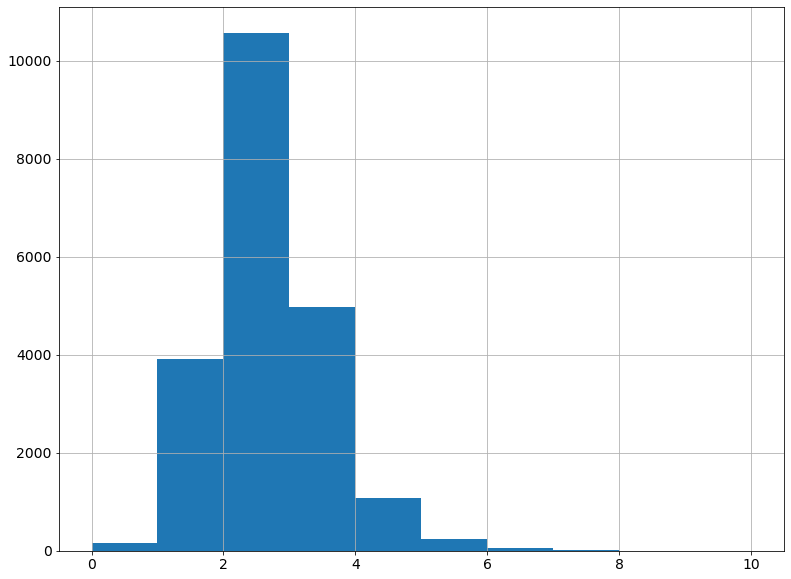

In [28]:
df.bathroomcnt.hist()

<AxesSubplot:>

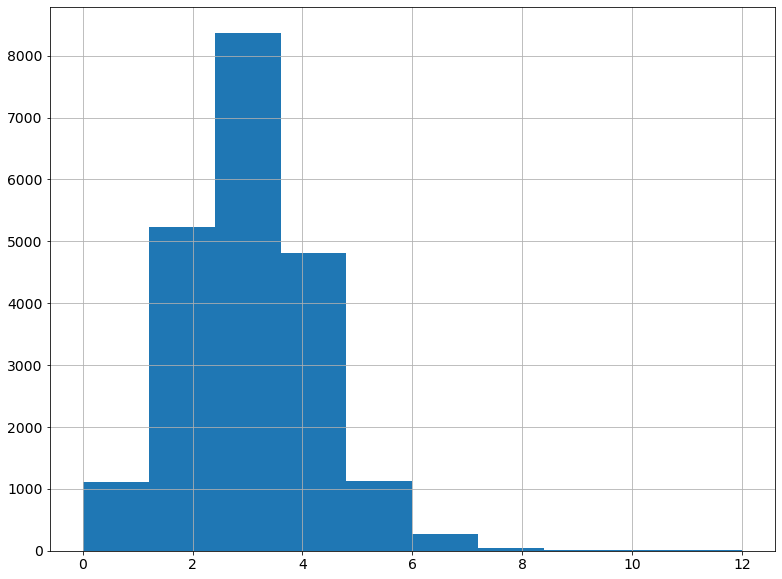

In [29]:
df.bedroomcnt.hist()

In [30]:
# Creating a diaginal heatmap that allows a clear view of the correlated features (independent variables)

<AxesSubplot:>

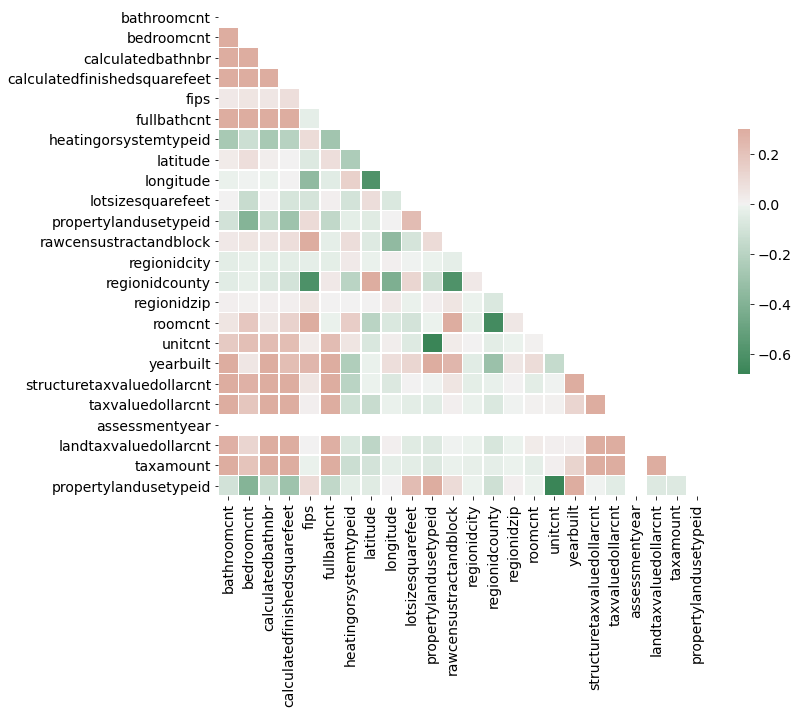

In [31]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(500, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
print(df.bathroomcnt.isna().sum())
print(df.bedroomcnt.isna().sum())
print(df.calculatedfinishedsquarefeet.isna().sum())

0
0
0


In [34]:
# For the MVP, these are the 3 features (columns) to focus on. 

<AxesSubplot:>

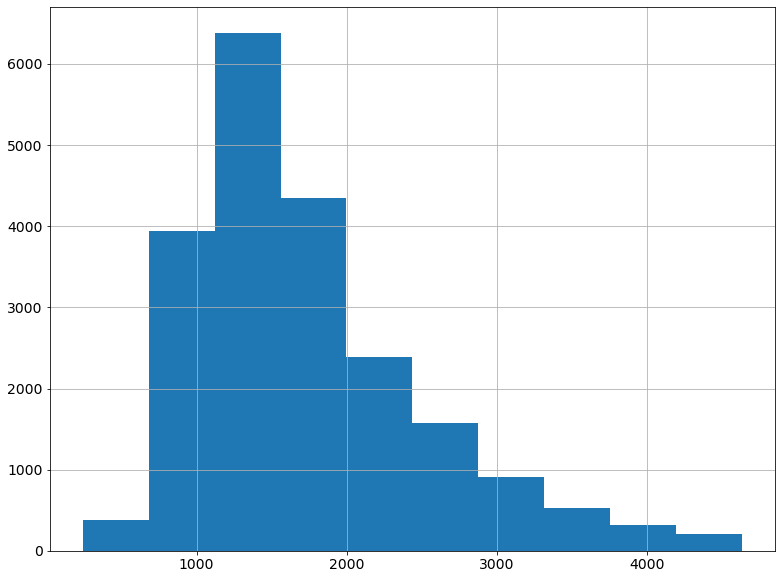

In [35]:
df.calculatedfinishedsquarefeet.hist()

In [36]:
# Let's go with the mean:

df.calculatedfinishedsquarefeet.mean()

1733.5904143513455

In [37]:
df['calculatedfinishedsquarefeet'] = df['calculatedfinishedsquarefeet'].fillna((df['calculatedfinishedsquarefeet'].mean()))

In [38]:
df.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,propertylandusetypeid
0,3.0,3.0,3.0,1534.0,6037.0,3.0,3.955741,33981374.0,-118317057.0,5000.0,247.0,6.037235e+07,12447.0,3101.0,96028.0,0.0,3.000000,1940.0,20684.0,43439.0,2016.0,22755.0,756.94,247.0
1,2.0,3.0,2.0,1458.0,6037.0,2.0,2.000000,34686163.0,-118113100.0,8284.0,261.0,6.037901e+07,5534.0,3101.0,97318.0,0.0,1.000000,1970.0,108890.0,136104.0,2016.0,27214.0,2319.90,261.0
2,1.0,2.0,1.0,1421.0,6037.0,1.0,2.000000,33999877.0,-118291863.0,6707.0,261.0,6.037232e+07,12447.0,3101.0,96018.0,0.0,1.000000,1911.0,11982.0,35606.0,2016.0,23624.0,543.69,261.0
3,3.0,4.0,3.0,2541.0,6059.0,3.0,3.955741,33694636.0,-117912245.0,4975.0,261.0,6.059064e+07,38032.0,1286.0,96958.0,0.0,1.108271,2003.0,434887.0,880456.0,2016.0,445569.0,9819.72,261.0
4,2.0,3.0,2.0,1650.0,6037.0,2.0,2.000000,33985377.0,-118361620.0,7300.0,261.0,6.037703e+07,396550.0,3101.0,96037.0,0.0,1.000000,1949.0,165000.0,614000.0,2016.0,449000.0,7673.19,261.0


## Using Corrplot

Attempting to use the corrplot function from biokit.viz

In [40]:
df_corr = df[['calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt',]]
df_corr.head()

,calculatedfinishedsquarefeet,bathroomcnt,bedroomcnt
0,1534.0,3.0,3.0
1,1458.0,2.0,3.0
2,1421.0,1.0,2.0
3,2541.0,3.0,4.0
4,1650.0,2.0,3.0


In [41]:
# Isolating the object columns so I can get a realistic heatmap:

# Creating the mask and if a column is an int/float/object
mask = np.array(df.dtypes == "object")

# Creating the boolean mask:
object_cols = df.iloc[:, mask].columns.tolist()
object_cols

[]

In [42]:
numeric_type_cols = df.iloc[:, ~mask].columns.tolist()
numeric_type_cols

['bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'fips',
 'fullbathcnt',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'propertylandusetypeid']

In [43]:
df_corr = df[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]
# df_corr.drop(columns = {'id', 'logerror'})
df_corr.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,3.0,3.0,1534.0,43439.0
1,2.0,3.0,1458.0,136104.0
2,1.0,2.0,1421.0,35606.0
3,3.0,4.0,2541.0,880456.0
4,2.0,3.0,1650.0,614000.0


Computing correlation


AttributeError: 'Colorbar' object has no attribute 'set_clim'

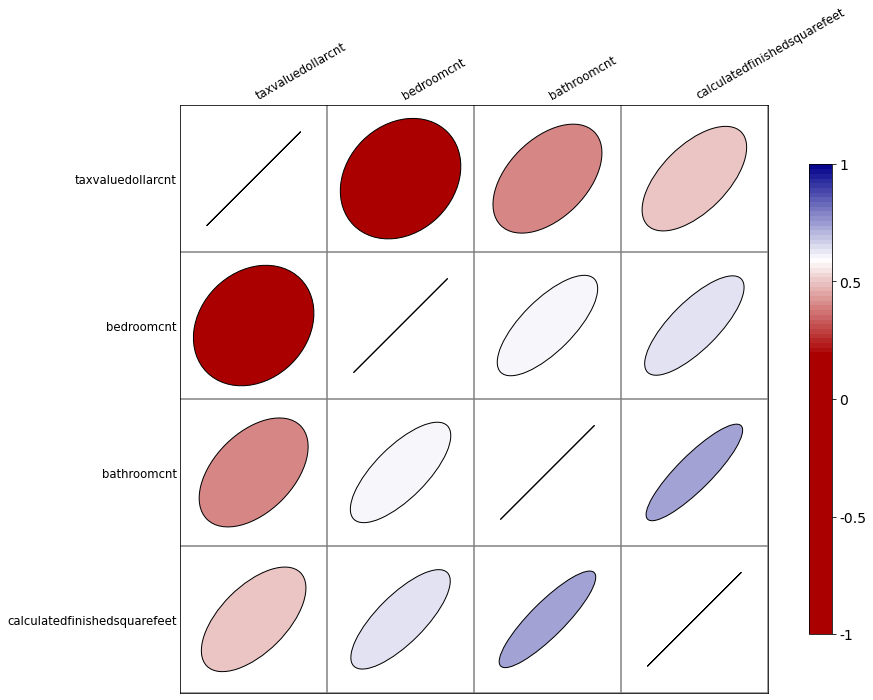

In [44]:
from biokit.viz import corrplot
c = corrplot.Corrplot(df_corr)
# c.plot(colorbar=False, method='circle', shrink=.9, lower='circle')
c.plot()

### MVP prep is almost done.

At this point we realized that we had to take out the object columns in the dataframe in order to scale our numeric data. We took out the object columns in order for our min_max_scale function to run appropriately.

In [20]:
# Now on to splitting the data:

df.head()
df.shape

NameError: name 'df' is not defined

### For the MVP, we only need 3 columns, plus a target variable, so I'm making an MVP dataframe that isolates those columns:

In [21]:
mvp_df = df[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']]
mvp_df.shape

NameError: name 'df' is not defined

In [22]:
# Importing the wrangle function:
import luke_wrangle

ModuleNotFoundError: No module named 'luke_wrangle'

In [23]:
import wrangle

wrangle.py functions loaded successfully


In [24]:
X_train, y_train, X_validate, y_validate, X_test, y_test = luke_wrangle.train_validate_test(mvp_df, 'taxvaluedollarcnt')

NameError: name 'luke_wrangle' is not defined

In [25]:
X_train.info()

NameError: name 'X_train' is not defined

In [26]:
X_train.shape, y_train.shape, X_validate.shape, X_test.shape

NameError: name 'X_train' is not defined

In [27]:
obj_cols = luke_wrangle.get_object_cols(df)
obj_cols

NameError: name 'luke_wrangle' is not defined

In [28]:
numeric_cols = luke_wrangle.get_numeric_X_cols(X_train, obj_cols)
numeric_cols

NameError: name 'luke_wrangle' is not defined

In [29]:
numeric_cols

NameError: name 'numeric_cols' is not defined

In [30]:
X_train.columns

NameError: name 'X_train' is not defined

In [31]:
X_train_scaled, X_validate_scaled, X_test_scaled = luke_wrangle.min_max_scale(X_train, X_validate, X_test, numeric_cols)

NameError: name 'luke_wrangle' is not defined

In [32]:
X_train_scaled.shape, X_validate_scaled.shape, X_test_scaled.shape

NameError: name 'X_train_scaled' is not defined

## Now we have an MVP dataset that has been split into X_train, etc. and Scaled

In [49]:
df.shape

(20977, 24)

In [50]:
X_train.shape, X_validate.shape, X_test.shape

NameError: name 'X_train' is not defined

In [35]:
numeric_cols_test = numeric_cols = luke_wrangle.get_numeric_X_cols(X_train, obj_cols)
len(numeric_cols_test)

NameError: name 'luke_wrangle' is not defined

In [36]:
X_train_scaled_full, X_validate_scaled_full, X_test_scaled_full = luke_wrangle.min_max_scale(X_train, X_validate, X_test, numeric_cols_test)

NameError: name 'luke_wrangle' is not defined

## Exploration

In [37]:
# Looking for variables that may have significance for our model...

In [51]:
df.head()

,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,propertylandusetypeid
0,3.0,3.0,3.0,1534.0,6037.0,3.0,3.955741,33981374.0,-118317057.0,5000.0,247.0,6.037235e+07,12447.0,3101.0,96028.0,0.0,3.000000,1940.0,20684.0,43439.0,2016.0,22755.0,756.94,247.0
1,2.0,3.0,2.0,1458.0,6037.0,2.0,2.000000,34686163.0,-118113100.0,8284.0,261.0,6.037901e+07,5534.0,3101.0,97318.0,0.0,1.000000,1970.0,108890.0,136104.0,2016.0,27214.0,2319.90,261.0
2,1.0,2.0,1.0,1421.0,6037.0,1.0,2.000000,33999877.0,-118291863.0,6707.0,261.0,6.037232e+07,12447.0,3101.0,96018.0,0.0,1.000000,1911.0,11982.0,35606.0,2016.0,23624.0,543.69,261.0
3,3.0,4.0,3.0,2541.0,6059.0,3.0,3.955741,33694636.0,-117912245.0,4975.0,261.0,6.059064e+07,38032.0,1286.0,96958.0,0.0,1.108271,2003.0,434887.0,880456.0,2016.0,445569.0,9819.72,261.0
4,2.0,3.0,2.0,1650.0,6037.0,2.0,2.000000,33985377.0,-118361620.0,7300.0,261.0,6.037703e+07,396550.0,3101.0,96037.0,0.0,1.000000,1949.0,165000.0,614000.0,2016.0,449000.0,7673.19,261.0


In [52]:
df.calculatedfinishedsquarefeet.mean()

1733.5904143513455

In [58]:
df.taxvaluedollarcnt.mean()

467226.1492587119

In [82]:
squareft = df[df.calculatedfinishedsquarefeet >= df.calculatedfinishedsquarefeet.mean()]
squareft.shape

(7895, 62)

In [89]:
# Hypothesis: Properties with more than 1 bedrooms have higher tax valuation:

roomcount = df[df.bedroomcnt > 1]
roomcount.shape

(20234, 62)

In [90]:
alpha = .05


t, p = stats.ttest_1samp(roomcount.taxvaluedollarcnt, df.taxvaluedollarcnt.mean())
print(f't = {t:.3f}')
print(f'p = {p:.3f}')

t = 1.590
p = 0.112


In [ ]:
ctab = 

In [55]:
# This is the first model, before isolating the best features:

zillow_heatmap = df[['calculatedfinishedsquarefeet', 'bathroomcnt', 'bedroomcnt', 'yearbuilt', 'propertylandusetypeid', 'taxamount']]

corr = zillow_heatmap.corr()
corr

,calculatedfinishedsquarefeet,bathroomcnt,bedroomcnt,yearbuilt,propertylandusetypeid,propertylandusetypeid,taxamount
calculatedfinishedsquarefeet,1.000000,0.740599,0.638380,0.226272,-0.300233,-0.300233,0.506293
bathroomcnt,0.740599,1.000000,0.607156,0.376003,-0.105905,-0.105905,0.409446
bedroomcnt,0.638380,0.607156,1.000000,0.049510,-0.390612,-0.390612,0.199340
yearbuilt,0.226272,0.376003,0.049510,1.000000,0.415123,0.415123,0.129863
propertylandusetypeid,-0.300233,-0.105905,-0.390612,0.415123,1.000000,1.000000,-0.060647
propertylandusetypeid,-0.300233,-0.105905,-0.390612,0.415123,1.000000,1.000000,-0.060647
taxamount,0.506293,0.409446,0.199340,0.129863,-0.060647,-0.060647,1.000000


In [56]:
plt.rc('figure', figsize=(13, 10))
plt.rc('font', size=14)

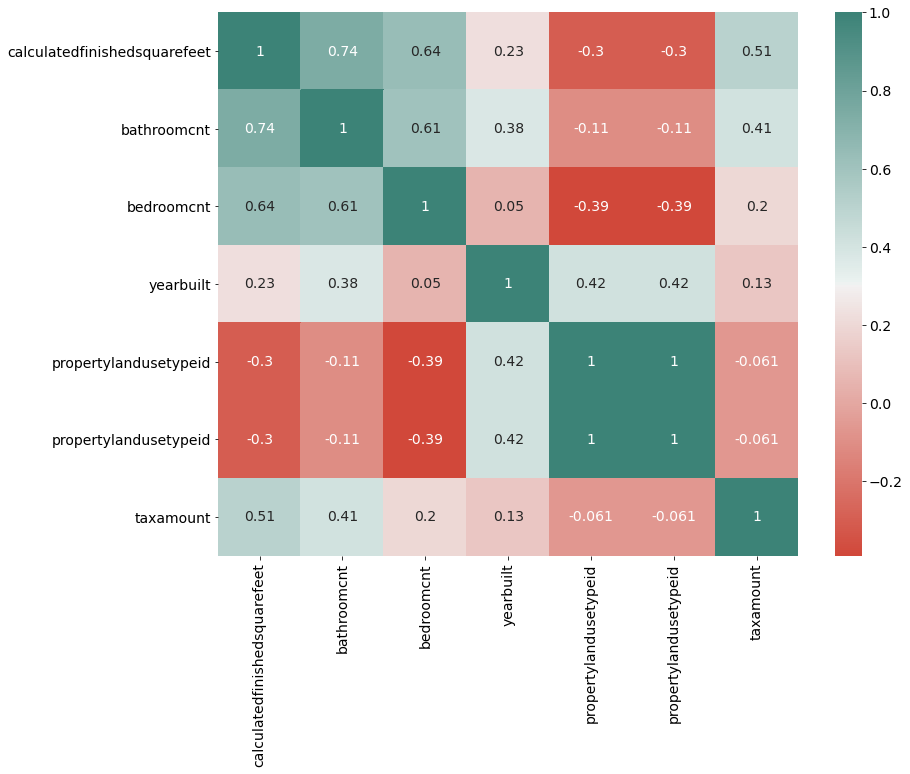

In [57]:
cmap = sns.diverging_palette(15, 175, as_cmap = True)

sns.heatmap(corr, annot = True, cmap = cmap)
plt.show()

In [44]:
sns.jointplot(y = "taxamount", x = "yearbuilt", data=df, kind='kde', height=5)
plt.show()

NameError: name 'df' is not defined

# Things to do
- Presentation and slides
- Readme
- Data Dictionary
- T-test
- Make visualizations using our 5 best features
- Answer these questions in explore:
    1. What independent variables are correlated with the dependent?
    2. Which independent variables are correlated with other independent variables?
- Markdown and Comment Notebooks
- Model.py
- Done - Acquire.py
- Done - Prep.py
- Done - Corr Test
- Done - Feature engineering